In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# After uploading, use this line to read the CSV file
df = pd.read_csv('lung_cancer_data.csv')

In [28]:
#Displaying the first row of the datset
df.head()

,Patient_ID,Age,Gender,Smoking_History,Years_Smoked,Pack_Years,Family_History_Cancer,Occupation,Exposure_to_Toxins,Residential_Area,...,Previous_Cancer_Diagnosis,Tumor_Size_cm,Metastasis_Status,Stage_of_Cancer,Treatment_Type,Survival_Years,Follow_Up_Visits,Medication_Response,Symptom_Progression,Year_of_Diagnosis
0,1,69,Male,Never,30,3,False,Farmer,False,Urban,...,True,11.02,True,III,Surgery,12,24,Good,Stable,2007
1,2,32,Female,Former,6,61,False,Office Worker,False,Urban,...,False,14.29,True,II,Chemotherapy,6,12,Poor,Stable,2009
2,3,89,Male,Never,2,9,True,Office Worker,True,Rural,...,False,9.47,False,III,Chemotherapy,6,15,Good,Worsening,2015
3,4,78,Female,Never,11,69,False,Factory Worker,True,Urban,...,False,2.22,False,IV,Chemotherapy,13,25,Moderate,Improving,2012
4,5,38,Male,Former,11,57,False,Farmer,False,Rural,...,False,8.26,False,III,Palliative,3,4,Good,Stable,2014


In [29]:
# Check for null values in each column
null_counts = df.isnull().sum()
print(null_counts)

Patient_ID                       0
Age                              0
Gender                           0
Smoking_History                  0
Years_Smoked                     0
Pack_Years                       0
Family_History_Cancer            0
Occupation                       0
Exposure_to_Toxins               0
Residential_Area                 0
BMI                              0
Lung_Function_Test_Result        0
Chest_Pain_Symptoms              0
Shortness_of_Breath              0
Chronic_Cough                    0
Weight_Loss                      0
Physical_Activity_Level          0
Dietary_Habits                   0
Air_Quality_Index                0
Comorbidities                90376
Previous_Cancer_Diagnosis        0
Tumor_Size_cm                    0
Metastasis_Status                0
Stage_of_Cancer                  0
Treatment_Type                   0
Survival_Years                   0
Follow_Up_Visits                 0
Medication_Response              0
Symptom_Progression 

In [30]:
# Drop 'Residential_Area' and 'Comorbidities' columns
df= df.drop(['Residential_Area', 'Comorbidities'], axis=1)

In [31]:
df.head()

,Patient_ID,Age,Gender,Smoking_History,Years_Smoked,Pack_Years,Family_History_Cancer,Occupation,Exposure_to_Toxins,BMI,...,Previous_Cancer_Diagnosis,Tumor_Size_cm,Metastasis_Status,Stage_of_Cancer,Treatment_Type,Survival_Years,Follow_Up_Visits,Medication_Response,Symptom_Progression,Year_of_Diagnosis
0,1,69,Male,Never,30,3,False,Farmer,False,27.8,...,True,11.02,True,III,Surgery,12,24,Good,Stable,2007
1,2,32,Female,Former,6,61,False,Office Worker,False,16.3,...,False,14.29,True,II,Chemotherapy,6,12,Poor,Stable,2009
2,3,89,Male,Never,2,9,True,Office Worker,True,18.1,...,False,9.47,False,III,Chemotherapy,6,15,Good,Worsening,2015
3,4,78,Female,Never,11,69,False,Factory Worker,True,22.3,...,False,2.22,False,IV,Chemotherapy,13,25,Moderate,Improving,2012
4,5,38,Male,Former,11,57,False,Farmer,False,28.3,...,False,8.26,False,III,Palliative,3,4,Good,Stable,2014


In [32]:
df = df.drop_duplicates()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Patient_ID                 300000 non-null  int64  
 1   Age                        300000 non-null  int64  
 2   Gender                     300000 non-null  object 
 3   Smoking_History            300000 non-null  object 
 4   Years_Smoked               300000 non-null  int64  
 5   Pack_Years                 300000 non-null  int64  
 6   Family_History_Cancer      300000 non-null  bool   
 7   Occupation                 300000 non-null  object 
 8   Exposure_to_Toxins         300000 non-null  bool   
 9   BMI                        300000 non-null  float64
 10  Lung_Function_Test_Result  300000 non-null  float64
 11  Chest_Pain_Symptoms        300000 non-null  bool   
 12  Shortness_of_Breath        300000 non-null  bool   
 13  Chronic_Cough              30

<ipython-input-34-0f077dc5173e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stage_age_counts = df.groupby(['Stage_of_Cancer', 'Age_Group']).size().reset_index(name='Count')


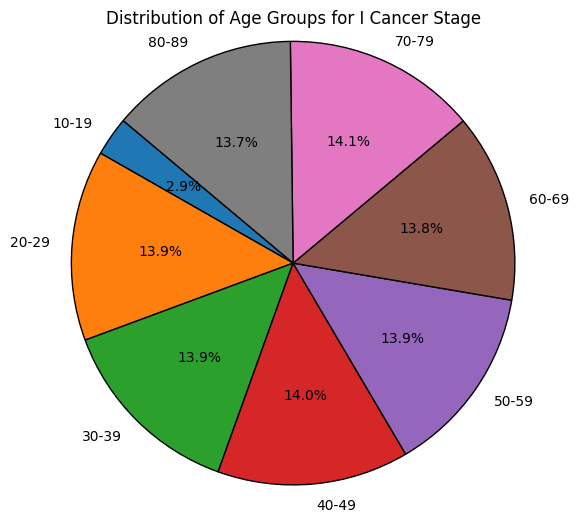

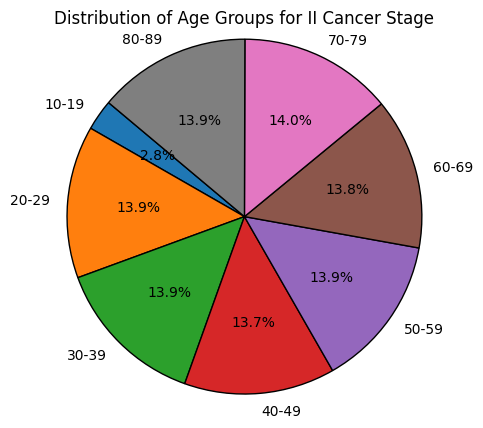

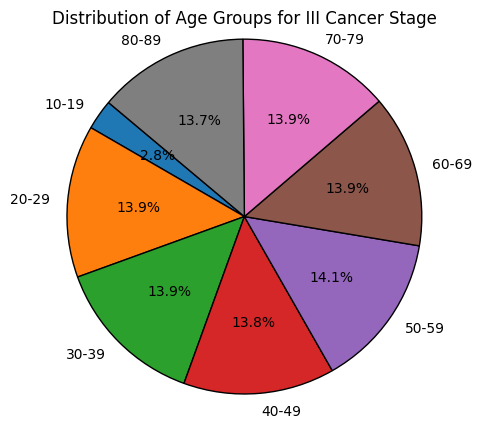

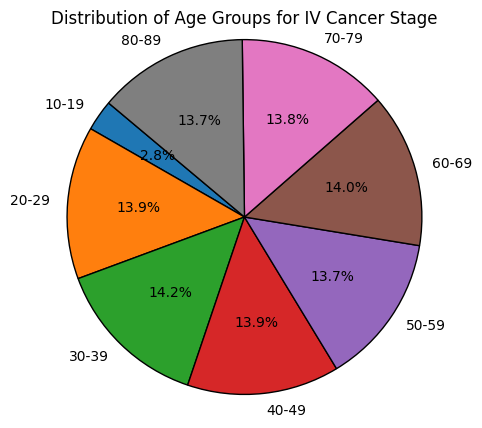

In [34]:
#If age is numeric, categorize it into age groups
df['Age_Group'] = pd.cut(df['Age'], bins=range(10, 100, 10), right=False, labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])

# Group the data by 'Stage_of_Cancer' and 'Age_Group' and count the occurrences
stage_age_counts = df.groupby(['Stage_of_Cancer', 'Age_Group']).size().reset_index(name='Count')

# Pivot the data for easier plotting
pivot_data = stage_age_counts.pivot(index='Age_Group', columns='Stage_of_Cancer', values='Count').fillna(0)

# Plotting the pie chart for each stage of cancer
plt.figure(figsize=(6, 6))

# Create a pie chart for each cancer stage
for stage in pivot_data.columns:
    plt.pie(pivot_data[stage], labels=pivot_data.index, autopct='%1.1f%%', startangle=140,
            labeldistance=1.1, radius=1.2, wedgeprops={'edgecolor': 'black'})
    plt.title(f'Distribution of Age Groups for {stage} Cancer Stage')
    plt.show()

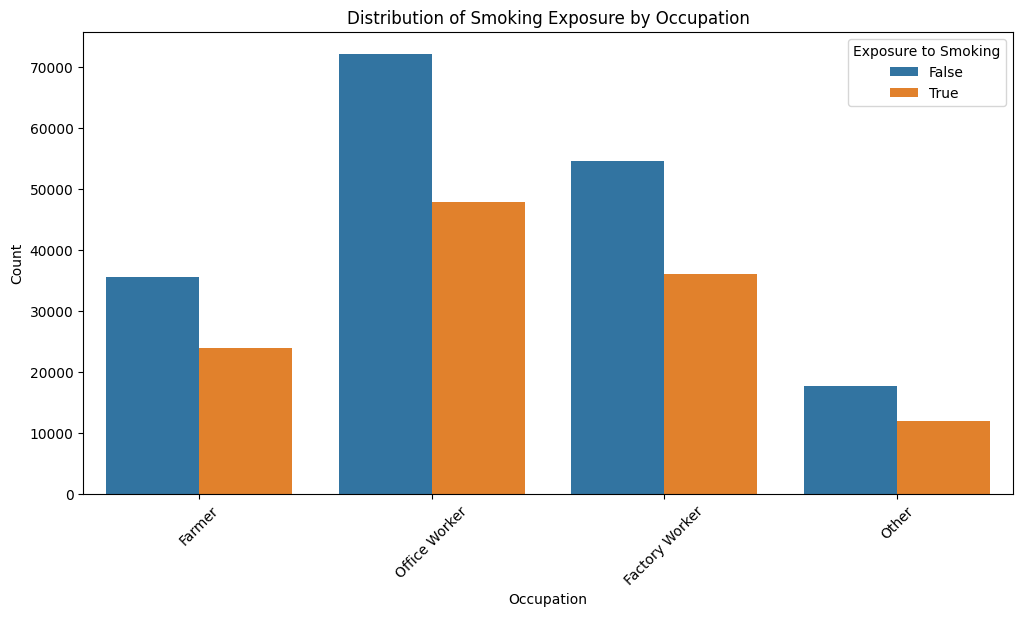

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Occupation', hue='Exposure_to_Toxins')
plt.title('Distribution of Smoking Exposure by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Exposure to Smoking')
plt.show()

<Figure size 1000x600 with 0 Axes>

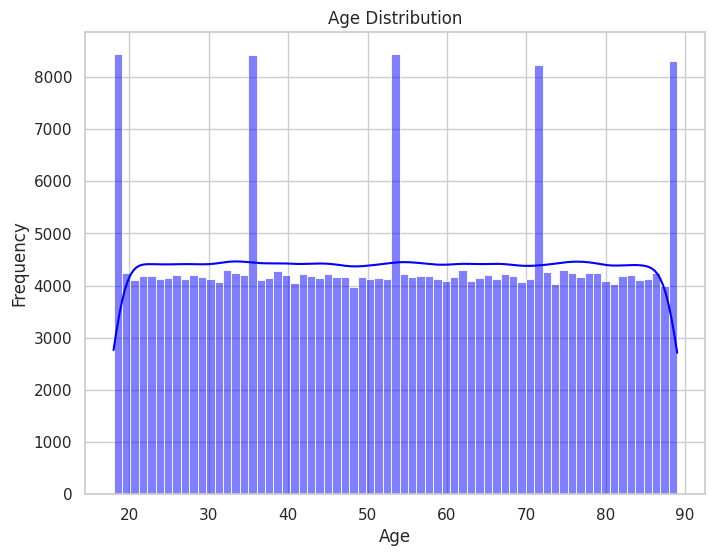

<ipython-input-40-81a243a6a595>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


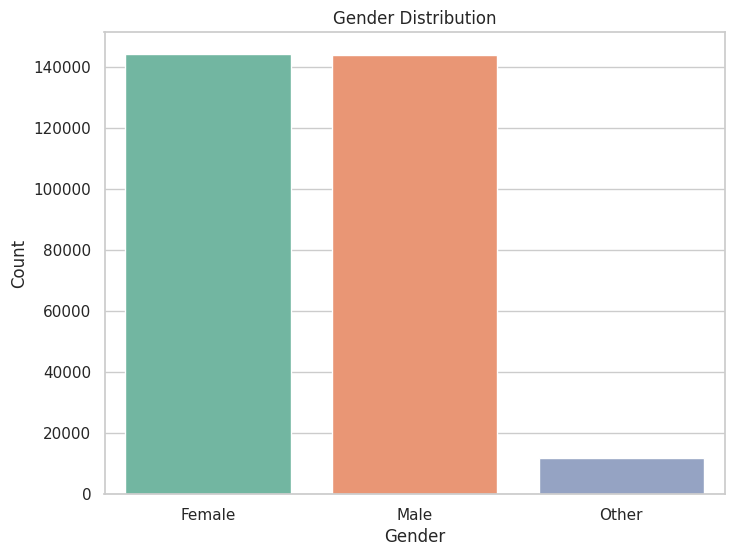

<ipython-input-40-81a243a6a595>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Smoking_History', y='Age', data=df, palette='Set3')


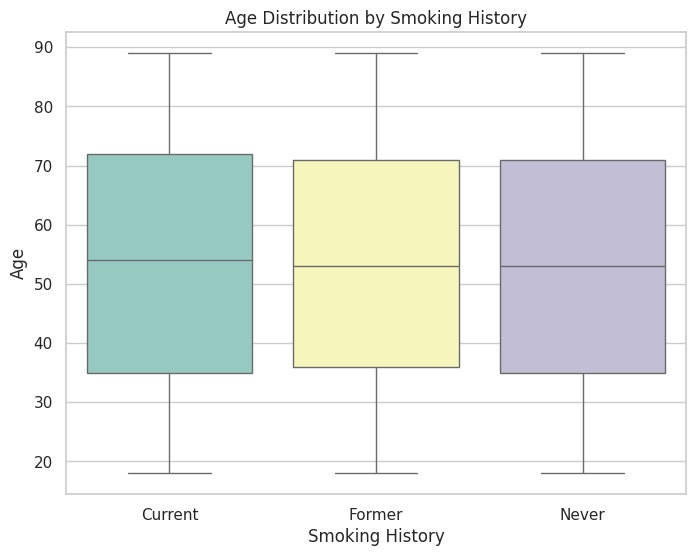

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


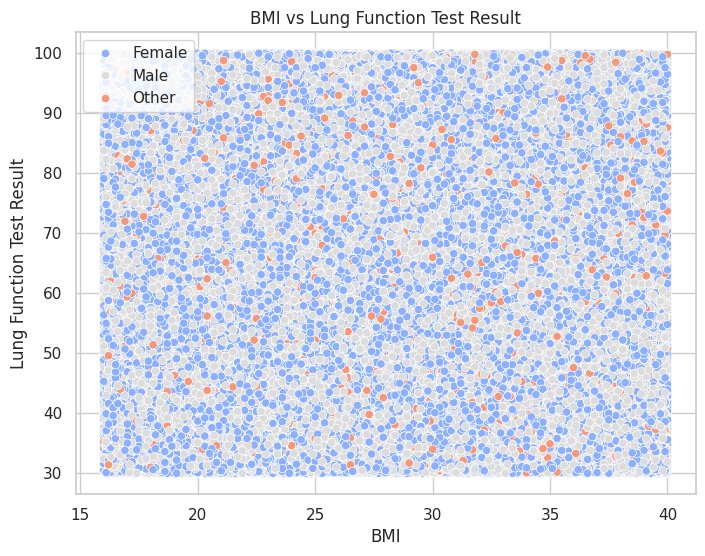

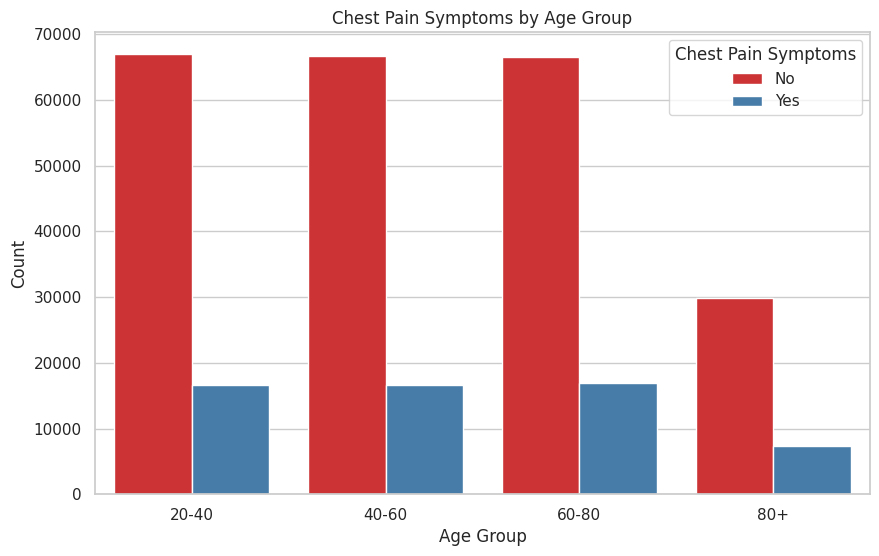

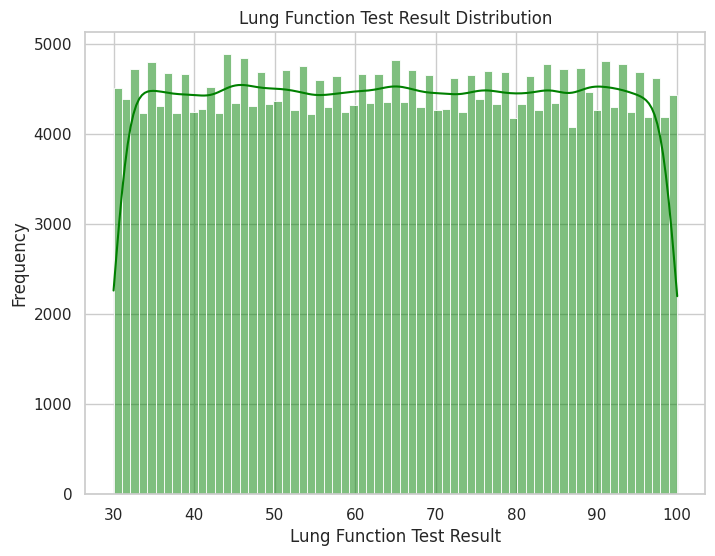

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


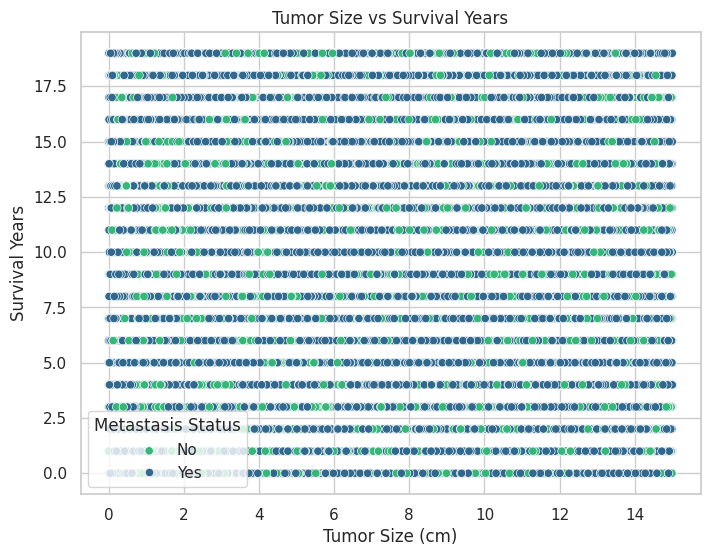

<ipython-input-40-81a243a6a595>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage_of_Cancer', y='Survival_Years', data=df, palette='muted')


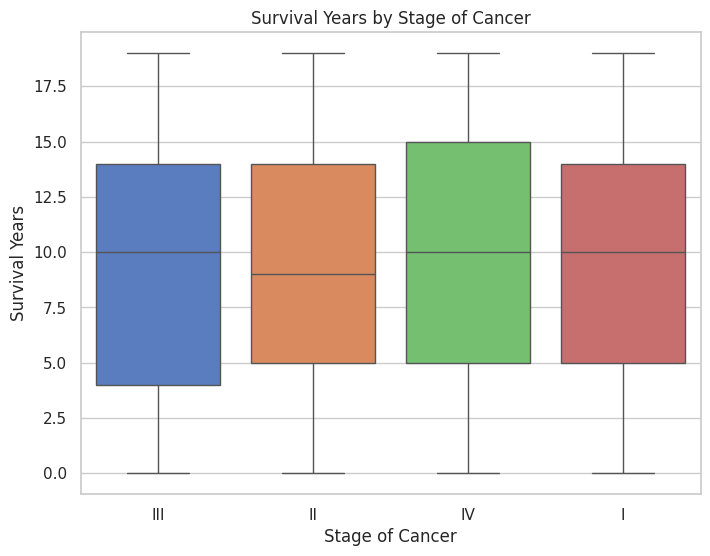

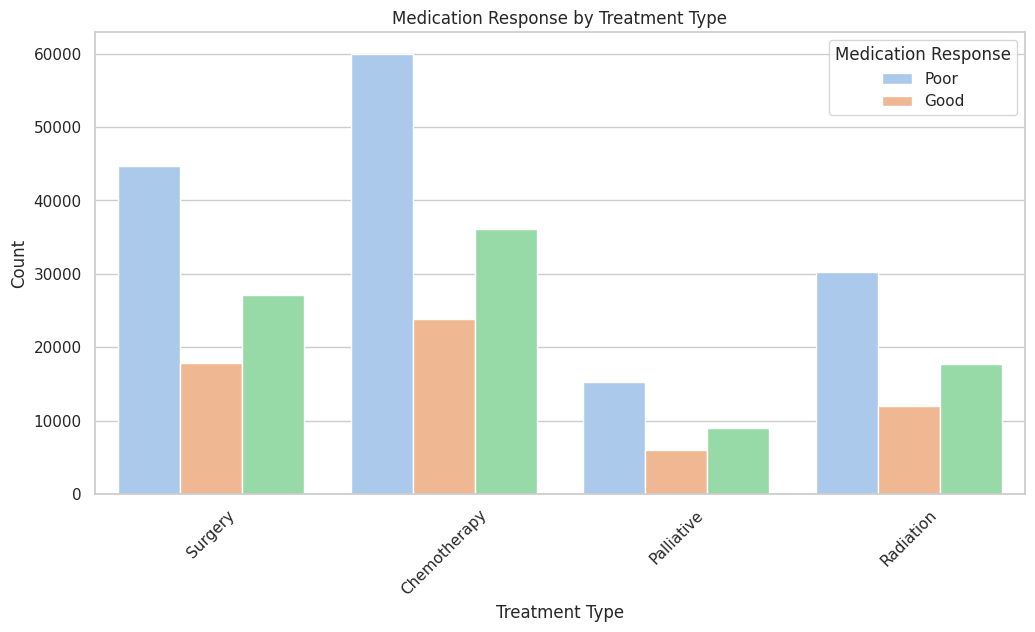

<ipython-input-40-81a243a6a595>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family_History_Cancer', data=df, palette='coolwarm')


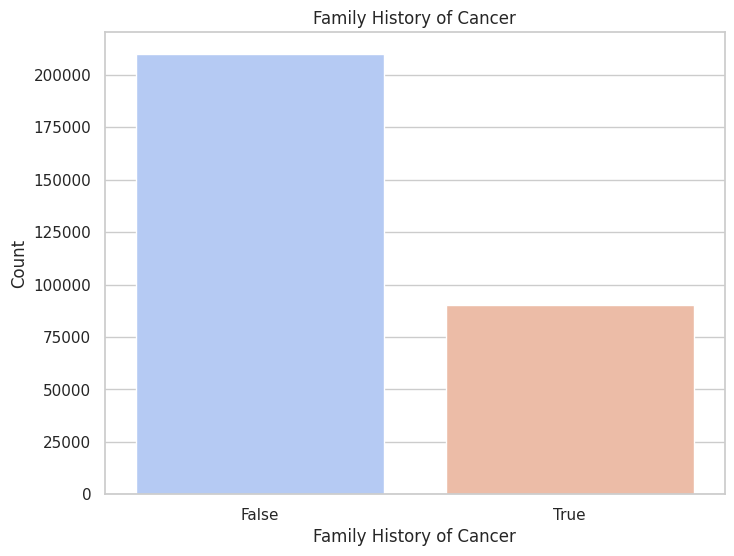

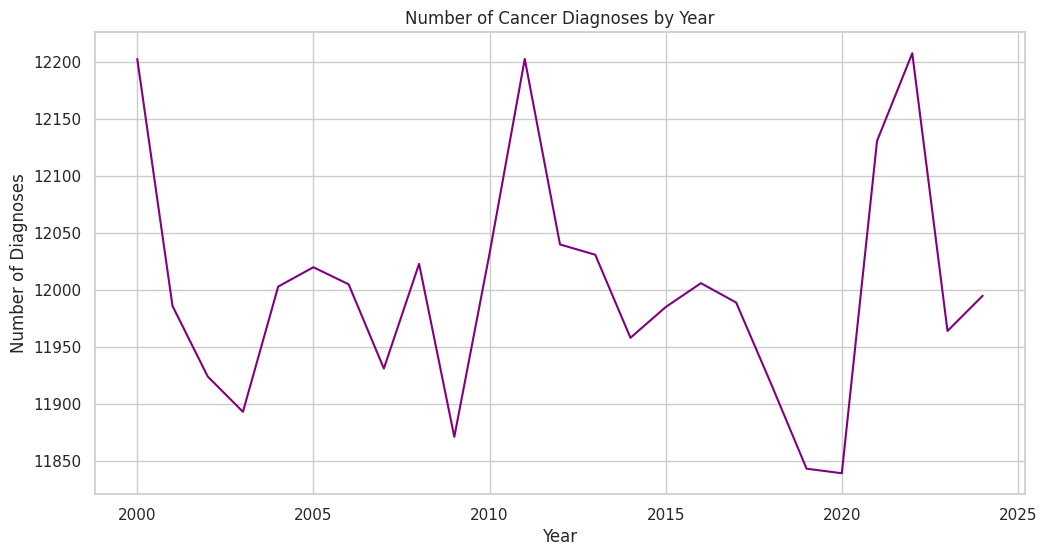

<ipython-input-40-81a243a6a595>:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='BMI', data=df, palette='Set2')


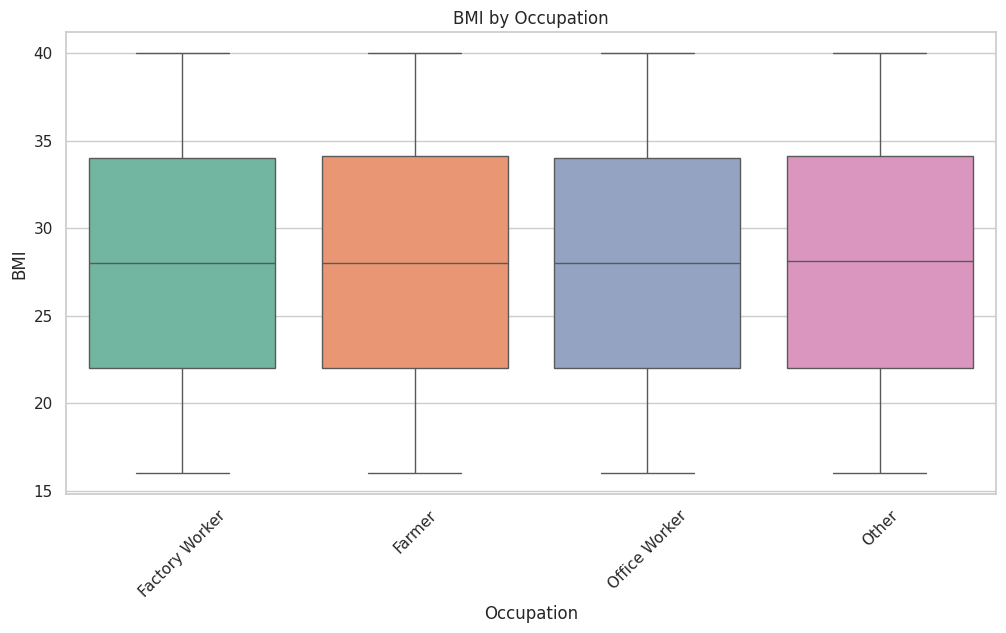

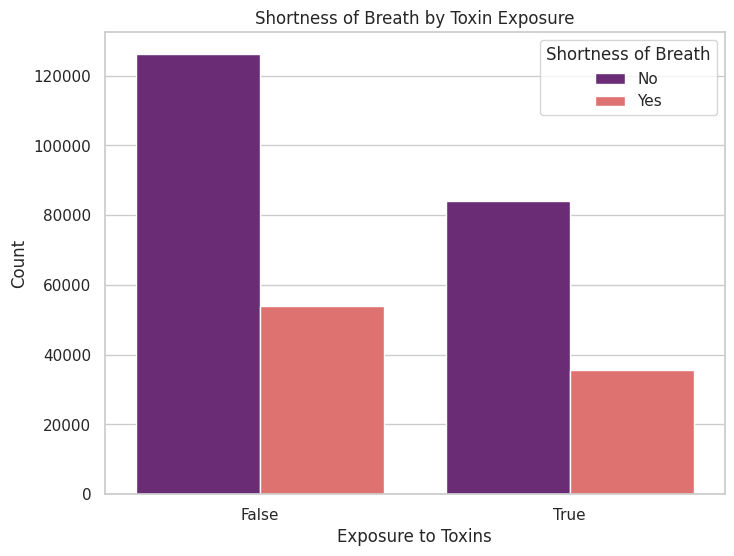

In [40]:
# Set basic configurations
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# 1. Histogram for Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Bar plot for Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 3. Box plot for Age distribution by Smoking History
plt.figure(figsize=(8, 6))
sns.boxplot(x='Smoking_History', y='Age', data=df, palette='Set3')
plt.title('Age Distribution by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Age')
plt.show()

# 4. Scatter plot for BMI vs Lung Function Test Result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Lung_Function_Test_Result', data=df, hue='Gender', palette='coolwarm')
plt.title('BMI vs Lung Function Test Result')
plt.xlabel('BMI')
plt.ylabel('Lung Function Test Result')
plt.legend()
plt.show()

# 5. Chest Pain Symptoms count by Age Group
plt.figure(figsize=(10, 6))
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 40, 60, 80, 100], labels=['20-40', '40-60', '60-80', '80+'])
sns.countplot(x='Age_Group', hue='Chest_Pain_Symptoms', data=df, palette='Set1')
plt.title('Chest Pain Symptoms by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Chest Pain Symptoms', labels=['No', 'Yes'])
plt.show()

# 6. Histogram for Lung Function Test Result distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Lung_Function_Test_Result'], kde=True, color='green')
plt.title('Lung Function Test Result Distribution')
plt.xlabel('Lung Function Test Result')
plt.ylabel('Frequency')
plt.show()

# 7. Scatter plot for Tumor Size vs Survival Years
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tumor_Size_cm', y='Survival_Years', data=df, hue='Metastasis_Status', palette='viridis')
plt.title('Tumor Size vs Survival Years')
plt.xlabel('Tumor Size (cm)')
plt.ylabel('Survival Years')
plt.legend(title='Metastasis Status', labels=['No', 'Yes'])
plt.show()

# 8. Box plot for Survival Years by Stage of Cancer
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stage_of_Cancer', y='Survival_Years', data=df, palette='muted')
plt.title('Survival Years by Stage of Cancer')
plt.xlabel('Stage of Cancer')
plt.ylabel('Survival Years')
plt.show()

# 9. Count plot for Medication Response by Treatment Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Treatment_Type', hue='Medication_Response', data=df, palette='pastel')
plt.title('Medication Response by Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Count')
plt.legend(title='Medication Response', labels=['Poor', 'Good'])
plt.xticks(rotation=45)
plt.show()

# 10. Bar plot for Family History of Cancer
plt.figure(figsize=(8, 6))
sns.countplot(x='Family_History_Cancer', data=df, palette='coolwarm')
plt.title('Family History of Cancer')
plt.xlabel('Family History of Cancer')
plt.ylabel('Count')
plt.show()

# 11. Line plot for Yearly Cancer Diagnosis trend
plt.figure(figsize=(12, 6))
df['Year_of_Diagnosis'] = pd.to_datetime(df['Year_of_Diagnosis'], format='%Y')
df.groupby(df['Year_of_Diagnosis'].dt.year).size().plot(kind='line', color='purple')
plt.title('Number of Cancer Diagnoses by Year')
plt.xlabel('Year')
plt.ylabel('Number of Diagnoses')
plt.show()

# 12. Box plot for BMI by Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='BMI', data=df, palette='Set2')
plt.title('BMI by Occupation')
plt.xlabel('Occupation')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()

# 13. Count plot for Shortness of Breath by Toxin Exposure
plt.figure(figsize=(8, 6))
sns.countplot(x='Exposure_to_Toxins', hue='Shortness_of_Breath', data=df, palette='magma')
plt.title('Shortness of Breath by Toxin Exposure')
plt.xlabel('Exposure to Toxins')
plt.ylabel('Count')
plt.legend(title='Shortness of Breath', labels=['No', 'Yes'])
plt.show()
